In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [8]:
data = pd.read_csv('log_csv/20210602_strain_plot_MRvsNH.csv')
data.head()

,Unnamed: 0,-E,-nu,-mu_1,-K,-mu_2,-problem,-bc_clamp,-bc_clamp_1_rotate,-bc_clamp_2_rotate,-bc_clamp_3_rotate,-bc_clamp_4_rotate,-bc_clamp_5_rotate,-bc_clamp_6_rotate,Configure,Load,Strain,filename
0,0,0.5,0.4,0.5,10,0,FSInitial-MR1,"1,2,3,4,5,6","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","PETSC_ARCH=libceed --download-{hdf5,netcdf,pne...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8.963585792095e-05, 0.000358541059542, 0.0008...",strain_plot/MR/log.txt
1,1,0.5,0.4,0.5,10,0,FSInitial-NH1,"1,2,3,4,5,6","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","PETSC_ARCH=libceed --download-{hdf5,netcdf,pne...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3.828396436549e-05, 0.0001530158452229, 0.000...",strain_plot/NH/log.txt


In [20]:
x_MR = [int(x) for x in data['Load'][0].replace('[', '').replace(']', '').strip().split(', ')]
x_NH = [int(x) for x in data['Load'][1].replace('[', '').replace(']', '').strip().split(', ')]
print(x_MR)
print(x_NH)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [21]:
y_MR = [float(x) for x in data['Strain'][0].replace('[', '').replace(']', '').strip().split(', ')]
y_NH = [float(x) for x in data['Strain'][1].replace('[', '').replace(']', '').strip().split(', ')]
print(y_MR, y_NH)

[8.963585792095e-05, 0.000358541059542, 0.0008067084881142, 0.00143412628131, 0.002240777829609, 0.003226641774037, 0.004391692003273, 0.005735897650122, 0.007259223087357, 0.008961627922948, 0.01084306699468, 0.01290349036418, 0.01514284331031, 0.01756106632205, 0.02015809509073, 0.02293386050177, 0.02588828862584, 0.02902130070946, 0.03233281316513, 0.03582273756088, 0.03949098060937, 0.04333744415641, 0.04736202516914, 0.05156461572354, 0.05594510299163, 0.06050336922815, 0.06523929175671, 0.07015274295565, 0.07524359024327, 0.08051169606277, 0.08595691786666, 0.0915791081008, 0.0973781141879, 0.1033537785107, 0.1095059383947, 0.1158344260905, 0.1223390687552, 0.1290196884345, 0.1358761020431, 0.1429081213455, 0.1429081213455] [3.828396436549e-05, 0.0001530158452229, 0.0003438361070859, 0.0006101472524219, 0.0009511166071444, 0.001365680578023, 0.001852550677295, 0.002410221614376, 0.003036981714413, 0.003730925842402, 0.004489970898566, 0.005311873883722, 0.006194251996017, 0.00713

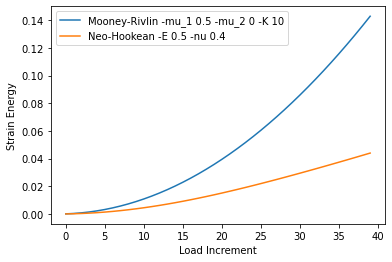

In [28]:
plt.plot(x_MR, y_MR[:-1], label = 'Mooney-Rivlin ' + '-mu_1 ' + str(data['-mu_1'][0]) + ' -mu_2 ' + str(data['-mu_2'][0]) + ' -K '+ str(data['-K'][0]))
plt.plot(x_NH, y_NH[:-1], label = 'Neo-Hookean ' + '-E ' + str(data['-E'][1]) + ' -nu ' + str(data['-nu'][1]))
plt.legend()
plt.xlabel('Load Increment')
plt.ylabel('Strain Energy')
plt.savefig('log_csv/20210602_strain_plot_MRvsNH.pdf', bbox_inches = 'tight')

In [3]:
#itertools testing

E = [0.5, 0.3, 0.2]
problem = ['FSInitial-NH1', 'FSInitial-MR1']
nu = [0.1, 0.2, 0.3]

print(list(itertools.product(E, problem, nu)))

[(0.5, 'FSInitial-NH1', 0.1), (0.5, 'FSInitial-NH1', 0.2), (0.5, 'FSInitial-NH1', 0.3), (0.5, 'FSInitial-MR1', 0.1), (0.5, 'FSInitial-MR1', 0.2), (0.5, 'FSInitial-MR1', 0.3), (0.3, 'FSInitial-NH1', 0.1), (0.3, 'FSInitial-NH1', 0.2), (0.3, 'FSInitial-NH1', 0.3), (0.3, 'FSInitial-MR1', 0.1), (0.3, 'FSInitial-MR1', 0.2), (0.3, 'FSInitial-MR1', 0.3), (0.2, 'FSInitial-NH1', 0.1), (0.2, 'FSInitial-NH1', 0.2), (0.2, 'FSInitial-NH1', 0.3), (0.2, 'FSInitial-MR1', 0.1), (0.2, 'FSInitial-MR1', 0.2), (0.2, 'FSInitial-MR1', 0.3)]
